In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from statannotations.Annotator import Annotator

In [2]:
cartography_df = pd.read_csv('./annotators-with-attitude-data-cartography.csv', index_col=0)
cartography_df['agreement_factor_base'] = cartography_df['agreement_factor']
cartography_df['agreement_factor'] = cartography_df['agreement_factor'].apply(lambda x: 0.6 if x==0.4 else x)
cartography_df.head()

,text_id,text,label_0_mean,label_0_std,label_0_last,label_1_mean,label_1_std,label_1_last,label,pred,...,toany_agr_factor,toany_agr_factor.1,toyou_agr_factor,toyou_mjr_vote,agreement_factor,confidence,variability,correctness,is_correct,agreement_factor_base
0,4,I do not dislike vegetables just the majority ...,0.559565,0.219775,0.870204,0.440435,0.219775,0.129796,0,0,...,0.833333,0,0.833333,0,0.833333,0.559565,0.219775,0.8,True,0.833333
1,15,Why don't Max just stay in the kitchen?,0.588035,0.236424,0.939842,0.411965,0.236424,0.060159,0,0,...,0.666667,0,0.666667,0,0.666667,0.588035,0.236424,1.0,True,0.666667
2,24,Reminds me about a guy on 4chan who genuinely ...,0.331928,0.180838,0.215669,0.668072,0.180838,0.784331,0,1,...,0.500000,0,0.500000,0,0.500000,0.331928,0.180838,0.2,False,0.500000
3,31,"its funny how few only want ""traditionalism"" o...",0.407420,0.159895,0.284247,0.592580,0.159895,0.715753,0,1,...,0.833333,0,0.833333,0,0.833333,0.407420,0.159895,0.2,False,0.833333
4,45,Politicians are two-timing,0.535334,0.078990,0.638035,0.464666,0.078990,0.361965,0,0,...,0.833333,0,0.833333,0,0.833333,0.535334,0.078990,0.6,True,0.833333


In [3]:
def round_agree_factor(agr_factor):
    if agr_factor <= 0.6:
        return 0.6
    elif agr_factor <= 0.8:
        return 0.8
    return 1.0

cartography_df['agreement_factor_rd'] = cartography_df['agreement_factor'].apply(lambda x: round_agree_factor(x))
cartography_df.head()

,text_id,text,label_0_mean,label_0_std,label_0_last,label_1_mean,label_1_std,label_1_last,label,pred,...,toany_agr_factor.1,toyou_agr_factor,toyou_mjr_vote,agreement_factor,confidence,variability,correctness,is_correct,agreement_factor_base,agreement_factor_rd
0,4,I do not dislike vegetables just the majority ...,0.559565,0.219775,0.870204,0.440435,0.219775,0.129796,0,0,...,0,0.833333,0,0.833333,0.559565,0.219775,0.8,True,0.833333,1.0
1,15,Why don't Max just stay in the kitchen?,0.588035,0.236424,0.939842,0.411965,0.236424,0.060159,0,0,...,0,0.666667,0,0.666667,0.588035,0.236424,1.0,True,0.666667,0.8
2,24,Reminds me about a guy on 4chan who genuinely ...,0.331928,0.180838,0.215669,0.668072,0.180838,0.784331,0,1,...,0,0.500000,0,0.500000,0.331928,0.180838,0.2,False,0.500000,0.6
3,31,"its funny how few only want ""traditionalism"" o...",0.407420,0.159895,0.284247,0.592580,0.159895,0.715753,0,1,...,0,0.833333,0,0.833333,0.407420,0.159895,0.2,False,0.833333,1.0
4,45,Politicians are two-timing,0.535334,0.078990,0.638035,0.464666,0.078990,0.361965,0,0,...,0,0.833333,0,0.833333,0.535334,0.078990,0.6,True,0.833333,1.0


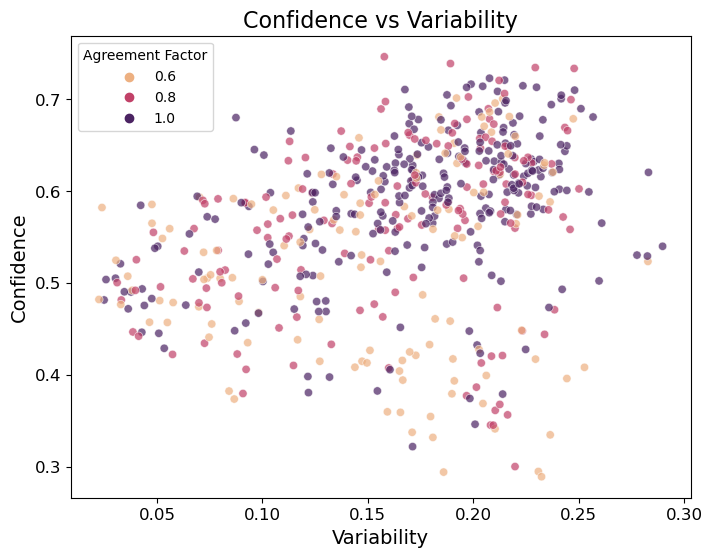

In [3]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cartography_df, x="variability", y="confidence", hue='agreement_factor', palette='flare', alpha=0.7)

plt.title("Confidence vs Variability", fontsize=16)
plt.gca().legend().set_title(str(plt.gca().legend().get_title()).capitalize())
plt.gca().set_xlabel(str(plt.gca().get_xlabel()).capitalize(), fontsize=14)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.legend(title='Agreement Factor')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("./plots/conf_vs_var_color_agreement_factor.png", dpi=600, bbox_inches='tight')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.6 vs. 0.8: Mann-Whitney-Wilcoxon test two-sided, P_val:2.038e-04 U_stat=8.143e+03
0.8 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:1.841e-02 U_stat=1.918e+04
0.6 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:2.959e-10 U_stat=1.069e+04


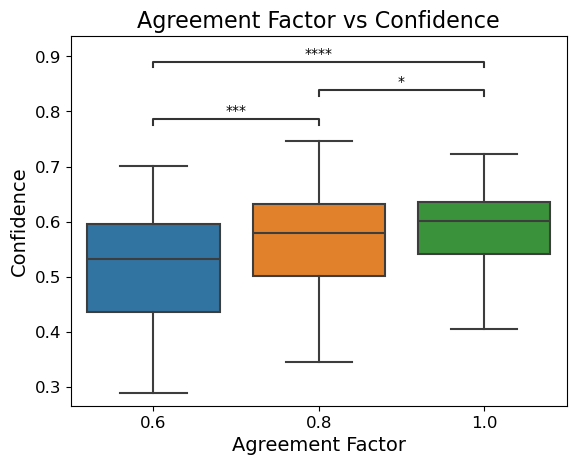

In [7]:
# sns.boxplot(data=cartography_df, x="agreement_factor", y="confidence")
# plt.title("Agreement Factor vs Confidence", fontsize=16)
# plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
# plt.gca().set_xlabel('Agreement Factor', fontsize=14)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.savefig("./agr_factor_vs_conf.png", dpi=600, bbox_inches='tight')

ax = sns.boxplot(data=cartography_df, x="agreement_factor", y="confidence", showfliers=False)

pairs=[(0.6, 0.8), (0.8, 1.0), (0.6, 1.0)]

annotator = Annotator(ax, pairs, data=cartography_df, x="agreement_factor", y="confidence")
annotator.configure(test='Mann-Whitney', text_format='star')
annotator.apply_and_annotate()

plt.title("Agreement Factor vs Confidence", fontsize=16)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.gca().set_xlabel('Agreement Factor', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("./plots/agr_factor_vs_conf.png", dpi=600, bbox_inches='tight')
# plt.savefig("agr_factor_vs_conf.png", dpi=600, bbox_inches='tight')

In [10]:
cartography_df['label_text'] = cartography_df['label'].map({0: 'not offensice', 1: 'offensive'})

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.6_0 vs. 1.0_0: Mann-Whitney-Wilcoxon test two-sided, P_val:9.785e-07 U_stat=2.949e+03
0.6_1 vs. 1.0_1: Mann-Whitney-Wilcoxon test two-sided, P_val:2.762e-03 U_stat=1.540e+02


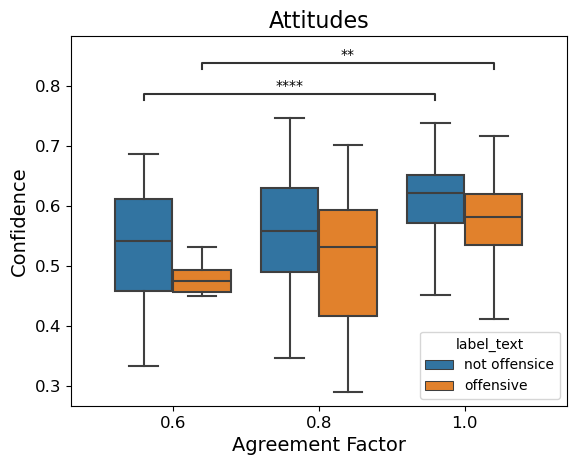

In [11]:
ax = sns.boxplot(data=cartography_df, x="agreement_factor_rd", y="confidence", showfliers=False, hue='label_text')

pairs=[ ((0.6, 0), (1.0, 0)), ((0.6, 1), (1.0, 1))]

annotator = Annotator(ax, pairs, data=cartography_df, x="agreement_factor_rd", y="confidence", hue='label')
annotator.configure(test='Mann-Whitney', text_format='star')
annotator.apply_and_annotate()

plt.title("Attitudes", fontsize=16)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.gca().set_xlabel('Agreement Factor', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("./plots/agr_factor_vs_conf_hue.png", dpi=600, bbox_inches='tight')

In [5]:
cartography_df['label'].value_counts()

1    286
0    278
Name: label, dtype: int64

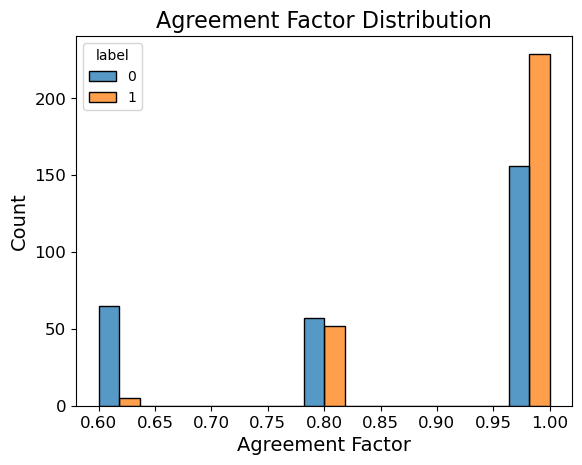

In [5]:
sns.histplot(data=cartography_df, x="agreement_factor_rd", hue='label', multiple='dodge')
plt.title("Agreement Factor Distribution", fontsize=16)
plt.gca().set_xlabel(str(plt.gca().get_xlabel()).capitalize(), fontsize=14)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.gca().set_xlabel('Agreement Factor', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("./plots/agr_factor_hist.png", dpi=600, bbox_inches='tight')

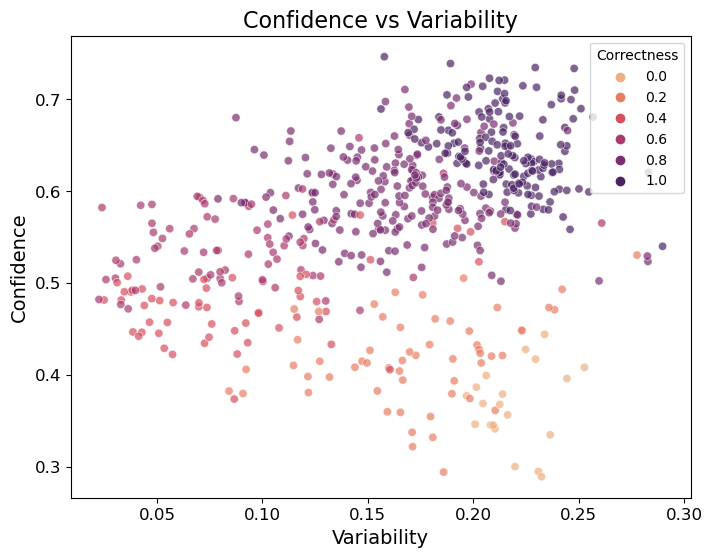

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cartography_df, x="variability", y="confidence", hue='correctness', palette='flare', alpha=0.7)

plt.title("Confidence vs Variability", fontsize=16)
plt.gca().legend().set_title(str(plt.gca().legend().get_title()).capitalize())
plt.gca().set_xlabel(str(plt.gca().get_xlabel()).capitalize(), fontsize=14)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Correctness', loc='upper right')
plt.savefig("./plots/conf_vs_var_color_correctness.png", dpi=600, bbox_inches='tight')

In [12]:
from scipy.stats import pearsonr

pearsonr(cartography_df['confidence'], cartography_df['agreement_factor_rd'])

PearsonRResult(statistic=0.2546198732094453, pvalue=8.523008496937362e-10)